# Deliverables:

- Submit the following files:

 1. Your **HTML document** that has your Source code and output
 2. Your **IPYNB script** that has your Source code and output


# Objectives:

In this exercise, you will:

 - Analyze the dataset in the given CSV file
 - Clean the given dataset
 - Load the dataset into sqlite database engine
 - Execute different SQL queries

**Formatting Python Code**<br>
When programming in Python, refer to Kenneth Reitz’ PEP 8: The Style Guide for Python Code: http://pep8.org/ (Links to an external site.)Links to an external site.There is the Google style guide for Python at https://google.github.io/styleguide/pyguide.html.Comment often and in detail.


###   Data Preparation

As a data scientist for BestDeal retailer, you have been tasked with improving their revenue and the effectiveness of the marketing campaign of their electronic products. The given dataset has 10,000 records for the purchases of their customers and is used to predict customers shopping patterns and to provide answers for ad-hoc queries. The dataset DirtyData4BestDeal10000.csv is drawn from its database of customers.

In [1]:
import pandas as pd  # panda's alias is pd

import numpy as np  # numpy as np

from pandas import DataFrame, Series     # for convenience

import sqlalchemy

from sqlalchemy import create_engine

from sqlalchemy import inspect


# import os
# os.getcwd()
# os.chdir('/')


### Lets read the dirtydata4bestdeal CSV and load into a dataframe object

In [2]:
dirtydata4bestdeal=pd.read_csv('DirtyData4BestDeal10000.csv')

In [3]:

# Do you see NaN values below?

dirtydata4bestdeal.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
2,60611.0,23.0,1,NaN,0,1,0,NaN,1.0,1.0,...,0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,30303.0,25.0,1,NaN,0,NaN,1,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,10.0,0


### Lets use boxplot to visualize the data and get an idea if there are dirty/messy/invalid data

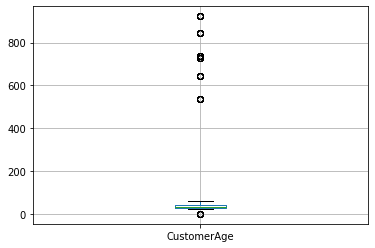

In [4]:
# https://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part%203%20-%20Plotting%20with%20Matplotlib.ipynb
%matplotlib inline
dirtydata4bestdeal.boxplot(column='CustomerAge')


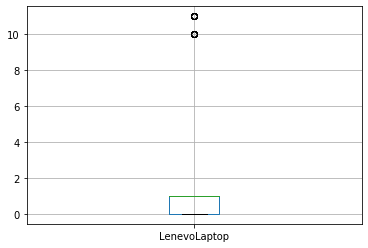

In [5]:
dirtydata4bestdeal.boxplot(column='LenevoLaptop')

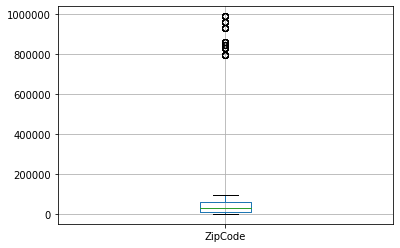

In [6]:
dirtydata4bestdeal.boxplot(column='ZipCode')


### Lets clean the dirty/messy data in the dirtydata4bestdeal dataframe object

In [7]:
# Drop the NaN values 

cleandata4bestdeal=dirtydata4bestdeal.dropna()
cleandata4bestdeal.head()

# Do you see NaN values dropped below?


,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
5,2108.0,55.0,1,1,1,1,10,0.0,0.0,0.0,...,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0
6,90033.0,44.0,1,1,1,1,0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1


In [8]:
# Let's see how many rows are left...
cleandata4bestdeal.shape

(9432, 34)

### Requirement: add the rest of your code here to finish cleaning the data


In [9]:

# Add the rest of your code here to clean the data
# I ended up with 9140 records by deleting records with out range customer ages 
# and out of range product flags (i.e. not 0 or 1).


In [10]:
# Create a new dataframe
cleandata4bestdeal2 = pd.DataFrame()

# Copy data from previous (cleandata4bestdeal) dataframe
cleandata4bestdeal2 = cleandata4bestdeal 

In [11]:
# Check the shape to ensure data was copied to a new dataframe properly.
cleandata4bestdeal2.shape

(9432, 34)

In [12]:
# Check the head of the data
cleandata4bestdeal2.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
5,2108.0,55.0,1,1,1,1,10,0.0,0.0,0.0,...,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0
6,90033.0,44.0,1,1,1,1,0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1


In [13]:
# Describe the data (mins, max, etc.)
cleandata4bestdeal2.describe()

,ZipCode,CustomerAge,SamsungTV46LED,BoseHeadSet,SonyHeadSet,iPod,iPhone,Panasonic50LED,SonyPS4,WiiU,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
count,9432.000000,9432.000000,9432.000000,9432.000000,9432.000000,9432.000000,9432.000000,9432.000000,9432.000000,9432.000000,...,9432.000000,9432.000000,9432.0,9432.000000,9432.000000,9432.000000,9432.000000,9432.000000,9432.000000,9432.000000
mean,44637.922604,39.298664,0.668893,0.522159,0.837150,0.181722,0.360687,0.235051,0.151930,0.485687,...,0.719678,0.106022,1.0,0.489822,0.691158,0.727629,0.396841,0.583651,0.623622,0.771735
std,71757.871503,55.474051,0.470636,0.585529,0.369248,0.491959,0.480225,0.424053,0.358972,0.511356,...,0.656350,0.645201,0.0,0.499923,0.605119,0.445203,0.871784,0.492979,0.572758,0.882297
min,2108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10065.000000,27.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30303.000000,34.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.0,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,60616.000000,43.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,990033.000000,923.000000,1.000000,11.000000,1.000000,11.000000,1.000000,1.000000,1.000000,11.000000,...,10.000000,11.000000,1.0,1.000000,10.000000,1.000000,11.000000,1.000000,11.000000,11.000000


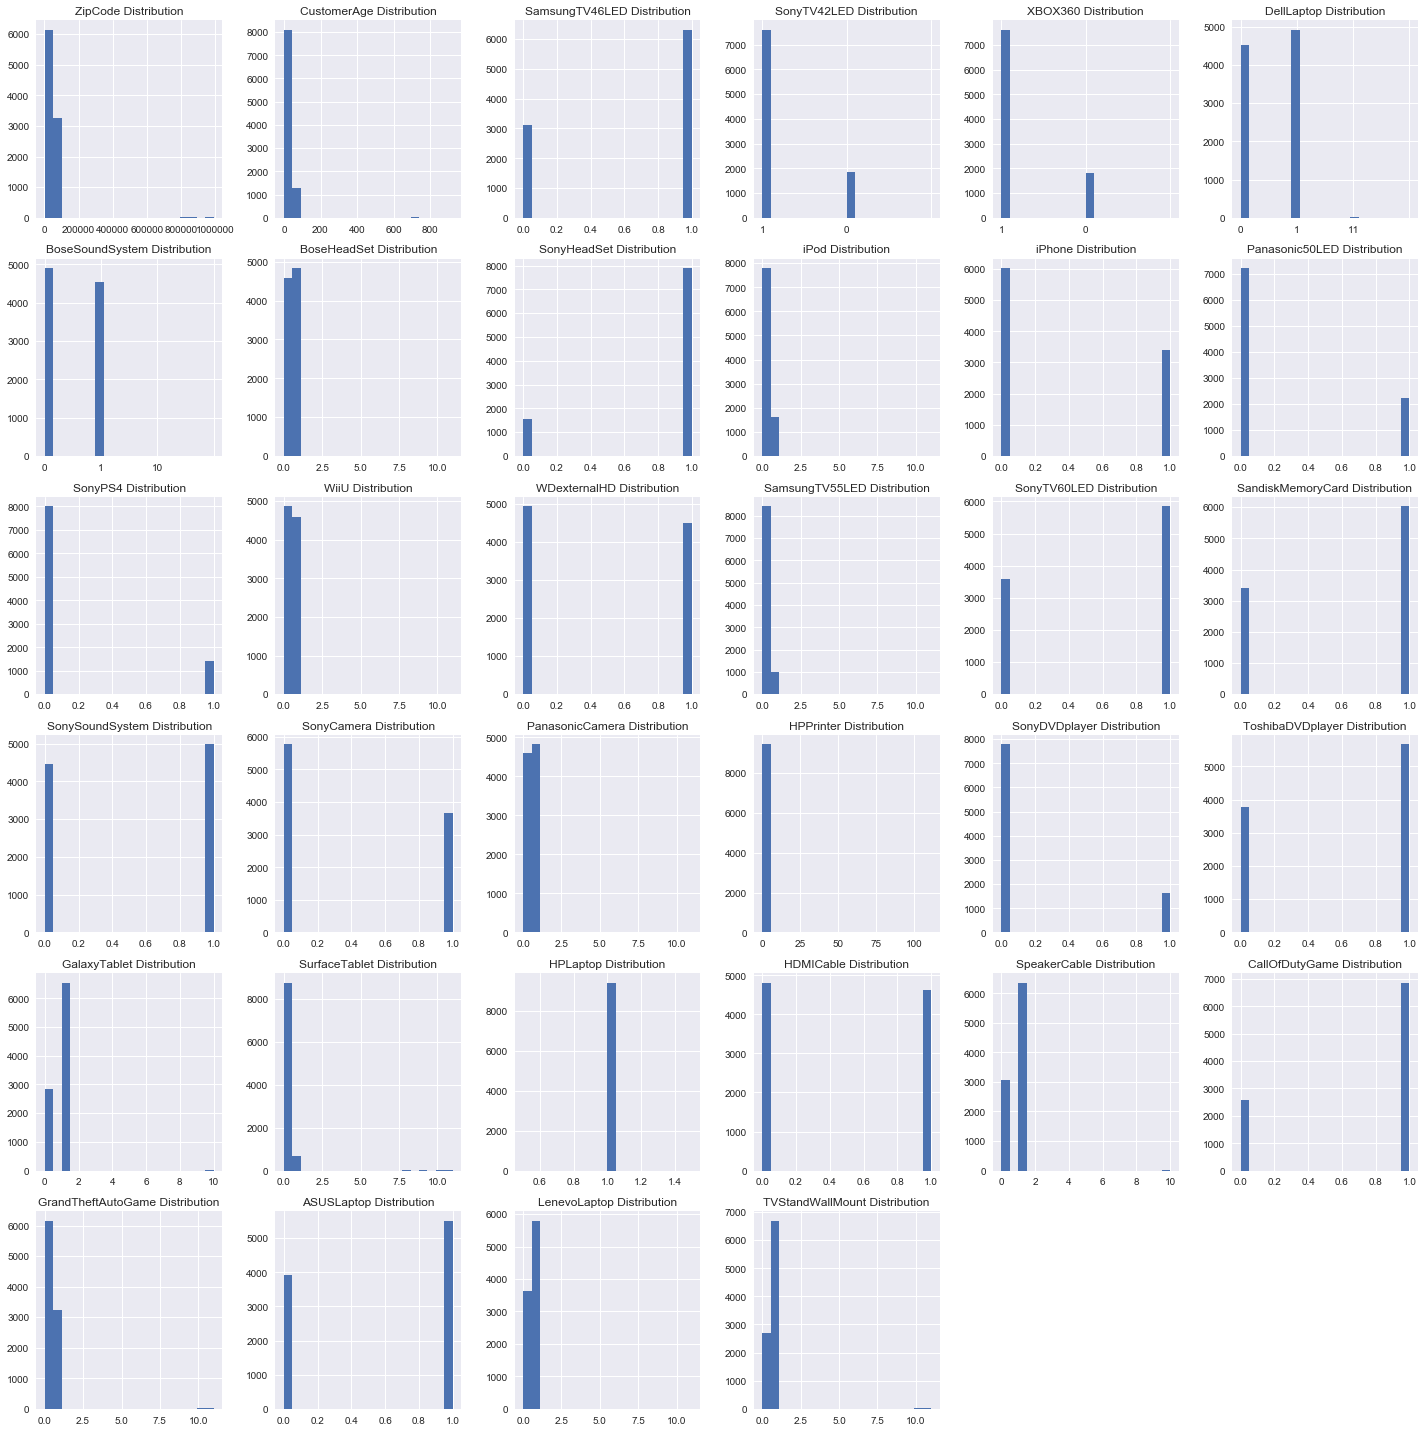

In [14]:
# Create histograms of the data features to see the distribution and any extreme values. 
import matplotlib.pyplot as plt
plt.style.use(['seaborn'])

def histograms_plot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax)
        ax.set_title(feature+" Distribution")
    fig.tight_layout()
plt.show()

histograms_plot(cleandata4bestdeal2,cleandata4bestdeal2.columns,6,6)

In [15]:
# Explicitly Mask (NaN) Customer Age values that equal 0
cleandata4bestdeal2['CustomerAge'] = cleandata4bestdeal2['CustomerAge'].mask(cleandata4bestdeal2['CustomerAge'] == 0)
cleandata4bestdeal2.shape 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(9432, 34)

In [16]:
# Mask (NaN) really low Customer Age values
cleandata4bestdeal2['CustomerAge'] = cleandata4bestdeal2['CustomerAge'].mask(cleandata4bestdeal2['CustomerAge'] <= 15)
cleandata4bestdeal2.shape 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(9432, 34)

In [17]:
# Mask (NaN) really high Customer Age values
cleandata4bestdeal2['CustomerAge'] = cleandata4bestdeal2['CustomerAge'].mask(cleandata4bestdeal2['CustomerAge'] >= 150)
cleandata4bestdeal2.shape 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(9432, 34)

In [18]:
# Explicitly Mask (NaN) Customer Age values that equal 0
cleandata4bestdeal2['CustomerAge'] = cleandata4bestdeal2['CustomerAge'].mask(cleandata4bestdeal2['CustomerAge'] == 0)
cleandata4bestdeal2.shape 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(9432, 34)

In [19]:
# Dropna values from Customer Age
cleandata4bestdeal2 = cleandata4bestdeal2.dropna()
cleandata4bestdeal2.shape 

(9368, 34)

In [20]:
# Replace blank cells with NaN and then remove them
cleandata4bestdeal2 = cleandata4bestdeal2.replace(r'^\s*$', np.nan, regex=True)
cleandata4bestdeal2 = cleandata4bestdeal2.dropna()
cleandata4bestdeal2.shape 

(9366, 34)

In [21]:
# Convert columns to Integers as they were all in various formats (string, float, etc.)
cleandata4bestdeal2.keys()
cleandata4bestdeal2 = cleandata4bestdeal2.astype(int)
cleandata4bestdeal2.dtypes

ZipCode               int64
CustomerAge           int64
SamsungTV46LED        int64
SonyTV42LED           int64
XBOX360               int64
DellLaptop            int64
BoseSoundSystem       int64
BoseHeadSet           int64
SonyHeadSet           int64
iPod                  int64
iPhone                int64
Panasonic50LED        int64
SonyPS4               int64
WiiU                  int64
WDexternalHD          int64
SamsungTV55LED        int64
SonyTV60LED           int64
SandiskMemoryCard     int64
SonySoundSystem       int64
SonyCamera            int64
PanasonicCamera       int64
HPPrinter             int64
SonyDVDplayer         int64
ToshibaDVDplayer      int64
GalaxyTablet          int64
SurfaceTablet         int64
HPLaptop              int64
HDMICable             int64
SpeakerCable          int64
CallOfDutyGame        int64
GrandTheftAutoGame    int64
ASUSLaptop            int64
LenevoLaptop          int64
TVStandWallMount      int64
dtype: object

In [22]:
# Mask (NaN) values greater than 1 and then remove it
cleandata4bestdeal2['DellLaptop'] = cleandata4bestdeal2['DellLaptop'].mask(cleandata4bestdeal2['DellLaptop'] > 1)
cleandata4bestdeal2 = cleandata4bestdeal2.dropna()
cleandata4bestdeal2.shape 

(9358, 34)

In [23]:
# Mask (NaN) values greater than 1 and then remove it
cleandata4bestdeal2['BoseSoundSystem'] = cleandata4bestdeal2['BoseSoundSystem'].mask(cleandata4bestdeal2['BoseSoundSystem'] > 1)
cleandata4bestdeal2 = cleandata4bestdeal2.dropna()
cleandata4bestdeal2.shape 

(9352, 34)

In [24]:
# Mask (NaN) values greater than 1 and then remove it
cleandata4bestdeal2['BoseHeadSet'] = cleandata4bestdeal2['BoseHeadSet'].mask(cleandata4bestdeal2['BoseHeadSet'] > 1)
cleandata4bestdeal2 = cleandata4bestdeal2.dropna()
cleandata4bestdeal2.shape 

(9344, 34)

In [25]:
# Mask (NaN) values greater than 1 and then remove it
cleandata4bestdeal2['iPod'] = cleandata4bestdeal2['iPod'].mask(cleandata4bestdeal2['iPod'] > 1)
cleandata4bestdeal2 = cleandata4bestdeal2.dropna()
cleandata4bestdeal2.shape 

(9336, 34)

In [26]:
# Mask (NaN) values greater than 1 and then remove it
cleandata4bestdeal2['WiiU'] = cleandata4bestdeal2['WiiU'].mask(cleandata4bestdeal2['WiiU'] > 1)
cleandata4bestdeal2 = cleandata4bestdeal2.dropna()
cleandata4bestdeal2.shape 

(9335, 34)

In [27]:
# Mask (NaN) values greater than 1 and then remove it
cleandata4bestdeal2['SamsungTV55LED'] = cleandata4bestdeal2['SamsungTV55LED'].mask(cleandata4bestdeal2['SamsungTV55LED'] > 1)
cleandata4bestdeal2 = cleandata4bestdeal2.dropna()
cleandata4bestdeal2.shape 

(9332, 34)

In [28]:
# Mask (NaN) values greater than 1 and then remove it
cleandata4bestdeal2['PanasonicCamera'] = cleandata4bestdeal2['PanasonicCamera'].mask(cleandata4bestdeal2['PanasonicCamera'] > 1)
cleandata4bestdeal2 = cleandata4bestdeal2.dropna()
cleandata4bestdeal2.shape 

(9330, 34)

In [29]:
# Mask (NaN) values greater than 1 and then remove it
cleandata4bestdeal2['HPPrinter'] = cleandata4bestdeal2['HPPrinter'].mask(cleandata4bestdeal2['HPPrinter'] > 1)
cleandata4bestdeal2 = cleandata4bestdeal2.dropna()
cleandata4bestdeal2.shape 

(9320, 34)

In [30]:
# Mask (NaN) values greater than 1 and then remove it
cleandata4bestdeal2['GalaxyTablet'] = cleandata4bestdeal2['GalaxyTablet'].mask(cleandata4bestdeal2['GalaxyTablet'] > 1)
cleandata4bestdeal2 = cleandata4bestdeal2.dropna()
cleandata4bestdeal2.shape 

(9296, 34)

In [31]:
# Mask (NaN) values greater than 1 and then remove it
cleandata4bestdeal2['SurfaceTablet'] = cleandata4bestdeal2['SurfaceTablet'].mask(cleandata4bestdeal2['SurfaceTablet'] > 1)
cleandata4bestdeal2 = cleandata4bestdeal2.dropna()
cleandata4bestdeal2.shape 

(9261, 34)

In [32]:
# Mask (NaN) values greater than 1 and then remove it
cleandata4bestdeal2['SpeakerCable'] = cleandata4bestdeal2['SpeakerCable'].mask(cleandata4bestdeal2['SpeakerCable'] > 1)
cleandata4bestdeal2 = cleandata4bestdeal2.dropna()
cleandata4bestdeal2.shape 

(9245, 34)

In [33]:
# Mask (NaN) values greater than 1 and then remove it
cleandata4bestdeal2['GrandTheftAutoGame'] = cleandata4bestdeal2['GrandTheftAutoGame'].mask(cleandata4bestdeal2['GrandTheftAutoGame'] > 1)
cleandata4bestdeal2 = cleandata4bestdeal2.dropna()
cleandata4bestdeal2.shape 

(9204, 34)

In [34]:
# Mask (NaN) values greater than 1 and then remove it
cleandata4bestdeal2['LenevoLaptop'] = cleandata4bestdeal2['LenevoLaptop'].mask(cleandata4bestdeal2['LenevoLaptop'] > 1)
cleandata4bestdeal2 = cleandata4bestdeal2.dropna()
cleandata4bestdeal2.shape 

(9196, 34)

In [35]:
# Mask (NaN) values greater than 1 and then remove it
cleandata4bestdeal2['TVStandWallMount'] = cleandata4bestdeal2['TVStandWallMount'].mask(cleandata4bestdeal2['TVStandWallMount'] > 1)
cleandata4bestdeal2 = cleandata4bestdeal2.dropna()
cleandata4bestdeal2.shape 

(9140, 34)

In [36]:
# Both of the following should return True

cleandata4bestdeal2.CustomerAge.between(18,150).all()

True

In [37]:
# Both of the following should return True

cleandata4bestdeal2.drop(['ZipCode','CustomerAge'],axis=1).isin([0,1]).all().all()

True

### Lets store the cleaned data into the Database

In [38]:
engine=create_engine('sqlite:///bestdeal.db')

In [39]:
# cleandata4bestdeal.to_sql('trans4cust', engine)
# cleandata4bestdeal.to_sql('trans4cust', engine, chunksize=100) 
cleandata4bestdeal2.to_sql('trans4cust', engine, if_exists='replace')

**Sanity Test: Did it create the table in bestdeal.db?  Check!!**

In [40]:
insp=inspect(engine)

In [41]:
 insp.get_table_names()

['trans4cust']

In [42]:
pd.read_sql_table('trans4cust', engine).columns

Index(['index', 'ZipCode', 'CustomerAge', 'SamsungTV46LED', 'SonyTV42LED',
       'XBOX360', 'DellLaptop', 'BoseSoundSystem', 'BoseHeadSet',
       'SonyHeadSet', 'iPod', 'iPhone', 'Panasonic50LED', 'SonyPS4', 'WiiU',
       'WDexternalHD', 'SamsungTV55LED', 'SonyTV60LED', 'SandiskMemoryCard',
       'SonySoundSystem', 'SonyCamera', 'PanasonicCamera', 'HPPrinter',
       'SonyDVDplayer', 'ToshibaDVDplayer', 'GalaxyTablet', 'SurfaceTablet',
       'HPLaptop', 'HDMICable', 'SpeakerCable', 'CallOfDutyGame',
       'GrandTheftAutoGame', 'ASUSLaptop', 'LenevoLaptop', 'TVStandWallMount'],
      dtype='object')

### Now we are ready to query the Database

#### Query example #1: get the transactions for the customers in zipCode 60616

In [43]:
resultsForBestDealCustTrans=\
pd.read_sql_query("SELECT * FROM trans4cust WHERE ZipCode='60616'", engine)

In [44]:
resultsForBestDealCustTrans.head()

,index,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,3,60616,56,0,1,1,1.0,0.0,0.0,1,...,0.0,0.0,1,0,1.0,0,0.0,1,0.0,0.0
1,16,60616,43,0,1,1,0.0,1.0,0.0,1,...,1.0,0.0,1,1,1.0,1,0.0,1,1.0,1.0
2,18,60616,54,1,0,0,1.0,0.0,1.0,1,...,0.0,1.0,1,0,1.0,1,0.0,1,1.0,1.0
3,23,60616,43,1,1,1,0.0,1.0,1.0,1,...,1.0,1.0,1,1,0.0,1,0.0,1,1.0,1.0
4,34,60616,31,0,1,1,1.0,0.0,0.0,1,...,1.0,0.0,1,1,1.0,1,1.0,0,0.0,1.0


#### Query example #2: get the transactions for ALL customers

In [45]:
resultsForBestDealCustTrans=\
pd.read_sql_query("SELECT * FROM trans4cust", engine)

In [46]:
resultsForBestDealCustTrans.head()

,index,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,0,30134,35,1,1,1,0.0,0.0,1.0,1,...,1.0,0.0,1,1,1.0,1,0.0,1,1.0,1.0
1,1,62791,43,0,1,0,0.0,1.0,0.0,1,...,1.0,0.0,1,0,1.0,1,0.0,1,1.0,1.0
2,3,60616,56,0,1,1,1.0,0.0,0.0,1,...,0.0,0.0,1,0,1.0,0,0.0,1,0.0,0.0
3,6,90033,44,1,1,1,1.0,0.0,0.0,0,...,1.0,1.0,1,1,0.0,1,1.0,0,0.0,1.0
4,9,2109,37,0,1,1,0.0,1.0,0.0,1,...,0.0,0.0,1,0,1.0,0,0.0,1,1.0,0.0


#### Query example #3: get the number of customers in every ZipCode sorted by ZipCode

In [47]:
resultsForBestDealCustTrans=\
pd.read_sql_query('''
SELECT printf("%g",ZipCode) ZipCode , COUNT(*) as 'num_customers'
FROM trans4cust GROUP BY ZipCode
ORDER BY ZipCode
''', engine)

In [48]:
resultsForBestDealCustTrans

,ZipCode,num_customers
0,10065,750
1,2108,613
2,2109,917
3,2110,224
4,30134,1133
5,30303,985
6,33129,531
7,33130,280
8,44114,510
9,60532,243


#### Query example #4: get the number of customers for  every Age Group in ZipCode 60616 sorted by CustomerAge

In [49]:
resultsForBestDealCustTrans=\
pd.read_sql_query('''
SELECT CustomerAge , COUNT(*) as 'num_customers'
FROM trans4cust 
WHERE ZipCode=60616
GROUP BY CustomerAge
ORDER BY CustomerAge
''', engine)

In [50]:
resultsForBestDealCustTrans

,CustomerAge,num_customers
0,21,56
1,22,32
2,23,40
3,25,88
4,26,48
5,27,32
6,28,32
7,29,56
8,31,16
9,32,16


#### Query example #5: Plot in a stacked-bar figure the number of customers who bought SonyTV60LED and/or BoseSoundSystem in  every zipcode that has more than 400 customers who bought these two products (either bought one of these products or the two products)

In [51]:
SonyTV60LEDCustTrans=pd.read_sql_query(
'''
SELECT ZipCode , COUNT(*) as 'num_customers' 
FROM trans4cust 
WHERE SonyTV60LED=1
GROUP BY ZipCode
HAVING COUNT(*) > 400
''', engine)

BoseSoundSystemCustTrans=pd.read_sql_query(
'''
SELECT ZipCode , COUNT(*) as 'num_customers' 
FROM trans4cust 
WHERE BoseSoundSystem=1
GROUP BY ZipCode
HAVING COUNT(*) > 400
''', engine)

In [52]:
SonyTV60LEDCustTrans

,ZipCode,num_customers
0,2108,402
1,2109,578
2,10065,439
3,30134,757
4,30303,517
5,60616,689


In [53]:
BoseSoundSystemCustTrans

,ZipCode,num_customers
0,2109,424
1,30134,799
2,30303,464
3,60616,466
4,90033,404


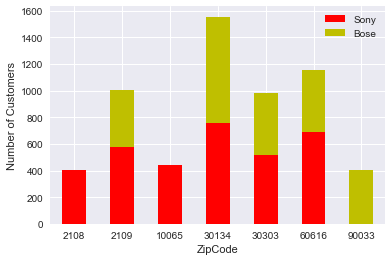

In [54]:
# Create the stacked bar plot...
# See docs for bar_stack at the URL
# http://matplotlib.org/examples/pylab_examples/bar_stacked.html

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

df =pd.merge(SonyTV60LEDCustTrans, BoseSoundSystemCustTrans, 
         on='ZipCode',how='outer').fillna(0)
df.columns = ['ZipCode', 'Sony', 'Bose']
df.set_index('ZipCode').plot(kind='bar',stacked=True,
                             rot = 0, color=['r','y'])
plt.ylabel('Number of Customers')
plt.show()

In [55]:
# Original more lengthy approach to creating the stacked bar graph.
import numpy

#   There are zipcodes that Sony got bought but not Bose 
#   but there are also zipcodes that Bose got bought but not Sony
#
#   AND we need to use stacked-bar graph and we have a potentially asymmetrical set  of zipcode values
#   So, we need to do somework to create the symmteric set of zipcode values for Sony and Bose


sonyZipCodeTuples=tuple(SonyTV60LEDCustTrans.ZipCode.astype(numpy.int))
sony_num_customersTuples=tuple(SonyTV60LEDCustTrans.num_customers.astype(numpy.int))

boseZipCodeTuples=tuple(BoseSoundSystemCustTrans.ZipCode.astype(numpy.int))
bose_num_customersTuples=tuple(BoseSoundSystemCustTrans.num_customers.astype(numpy.int))




sony_dict = dict(zip(sonyZipCodeTuples, sony_num_customersTuples))
bose_dict = dict(zip(boseZipCodeTuples, bose_num_customersTuples))

for key in bose_dict.keys():
    if ((key in sony_dict.keys()) == False): sony_dict[key]=0

        
for key in sony_dict.keys():
    if ((key in bose_dict.keys()) == False): bose_dict[key]=0


        
bose_zip= sorted(bose_dict.keys())

sony_zip= sorted(sony_dict.keys())

bose_zip_tuple=tuple(bose_zip)

sony_zip_tuple=tuple(sony_zip)

bose_customer_list=[]

for bose in bose_zip_tuple:
    bose_customer_list.append(bose_dict[bose])

sony_customer_list=[]

for sony in sony_zip_tuple:
    sony_customer_list.append(sony_dict[sony])

bose_customer_tuple=tuple(bose_customer_list)
sony_customer_tuple=tuple(sony_customer_list)


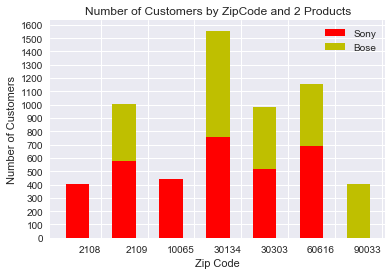

In [56]:
# See docs for bar_stack at the URL
# http://matplotlib.org/examples/pylab_examples/bar_stacked.html

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 


ind = np.arange(len(sony_customer_tuple))    


# the width of the bars: can also be len(x) sequence
width = .5


p1 = plt.bar(ind, sony_customer_tuple, width,  color='r')
p2 = plt.bar(ind, bose_customer_tuple, width, color='y', bottom=sony_customer_tuple)


plt.ylabel('Number of Customers')
plt.xlabel('Zip Code')

plt.title('Number of Customers by ZipCode and 2 Products')

plt.xticks(ind + width, sony_zip_tuple, horizontalalignment='right')

plt.yticks(np.arange(0, 1610, 100))
plt.legend((p1[0], p2[0]), ('Sony', 'Bose'))

plt.show()

# Requirements :
**Note**: Part of the requirements is to finish cleaning the data before writing the DataFrame to the database.
1. (Use SQL/SQlite): Get the number of customers who bought DellLaptop and HPPrinter for every Age group sorted by CustomerAge.
2. (Use SQL/SQlite): Get the list of ZipCodes where no customer bought XBOX360 (this query means NOT even a single csutomer in that zip code bought XBOX360)
3. (Use SQL/SQlite/Matplotlib): Plot in a stacked-bar figure the number of customers who bought HPLaptop and/or HPPrinter but did NOT buy  WDexternalHD for  every CustomerAge group that has more than 100 customers who bought these two products (either bought one of these products or the two products but didn't buy WDexternalHD)
4. (Use SQL/SQlite): Show the top 3 zip codes with the most customers
5. (Use SQL/SQlite): Selecting the customers from the top 3 zip codes (results from question 4), what are ages of the customers? Sort output by most customers. You can show all 3 zip codes combined or show ages by zip codes.


In [57]:
# Write your python code that meets the above requirements in this cell


In [58]:
# Requirement #1

pd.read_sql_table('trans4cust', engine).columns

resultsDellHPCustomerByAge=pd.read_sql_query('''
SELECT CustomerAge , COUNT(*) as 'num_customers'
FROM trans4cust 
WHERE DellLaptop=1 AND HPPrinter=1
GROUP BY CustomerAge
ORDER BY CustomerAge
''', engine)

resultsDellHPCustomerByAge

,CustomerAge,num_customers
0,21,201
1,22,203
2,23,304
3,25,64
4,26,183
5,27,272
6,28,56
7,29,143
8,31,202
9,32,184


In [59]:
# Requirement #2

resultsNoXBOX360ByZipCode=pd.read_sql_query(
'''
SELECT ZipCode
FROM trans4cust 
GROUP BY ZipCode 
HAVING sum(XBOX360) = 0 
''', engine)

resultsNoXBOX360ByZipCode

,ZipCode
0,62791


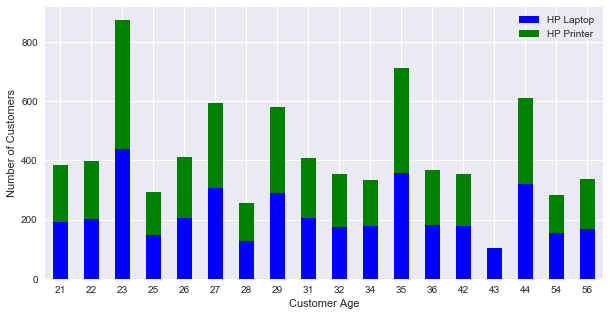

In [60]:
# Requirement #3


HPLaptopCustTrans=pd.read_sql_query(
'''
SELECT CustomerAge, COUNT(*) as 'num_customers' 
FROM trans4cust 
WHERE (HPLaptop=1 AND WDexternalHD=0)
GROUP BY CustomerAge
HAVING num_customers > 100
''', engine)

HPPrinterCustTrans=pd.read_sql_query(
'''
SELECT CustomerAge, COUNT(*) as 'num_customers' 
FROM trans4cust 
WHERE (HPPrinter=1 AND WDexternalHD=0)
GROUP BY CustomerAge
HAVING num_customers > 100
''', engine)

HPLaptopCustTrans

HPPrinterCustTrans

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')

plt.rcParams['figure.figsize'] = [10, 5]
df_1 = pd.merge(HPLaptopCustTrans, HPPrinterCustTrans, 
         on='CustomerAge',how='outer').fillna(0)
df_1.columns = ['CustomerAge', 'HP Laptop', 'HP Printer']
df_1.set_index('CustomerAge').plot(kind='bar',stacked=True,
                             rot = 0, color=['b','g'])
plt.ylabel('Number of Customers')
plt.xlabel('Customer Age')
plt.show()

In [61]:
# Requirement #4

Top3ZipCodeCust=pd.read_sql_query(
'''
SELECT ZipCode, COUNT(*) as 'NumOfCust' 
FROM trans4cust 
GROUP BY ZipCode
ORDER BY NumOfCust DESC
LIMIT 3
''', engine)

Top3ZipCodeCust

,ZipCode,NumOfCust
0,30134,1133
1,30303,985
2,60616,951


In [62]:
# Requirement #5A

Top3ZipCodeCustAge5A=pd.read_sql_query(
'''
SELECT CustomerAge, COUNT(*) as 'num_customers' 
FROM trans4cust 
WHERE ZipCode=30134 OR ZipCODE=30303 OR ZipCode=60616
GROUP BY CustomerAge
ORDER BY num_customers DESC
''', engine)

Top3ZipCodeCustAge5A

,CustomerAge,num_customers
0,25,277
1,34,231
2,44,222
3,29,214
4,43,191
5,27,153
6,37,148
7,23,148
8,26,133
9,35,115


In [63]:
# Requirement #5B

Top3ZipCodeCustAge5B=pd.read_sql_query(
'''
SELECT ZipCode, CustomerAge, COUNT(*) as 'num_customers' 
FROM trans4cust 
WHERE ZipCode=30134 OR ZipCODE=30303 OR ZipCode=60616
GROUP BY ZipCode, CustomerAge
ORDER BY num_customers DESC
''', engine)

Top3ZipCodeCustAge5B

,ZipCode,CustomerAge,num_customers
0,30134,25,154
1,60616,34,96
2,60616,25,88
3,60616,44,87
4,30134,29,84
5,30303,26,83
6,30303,27,81
7,30303,44,77
8,30134,43,75
9,30134,34,74
